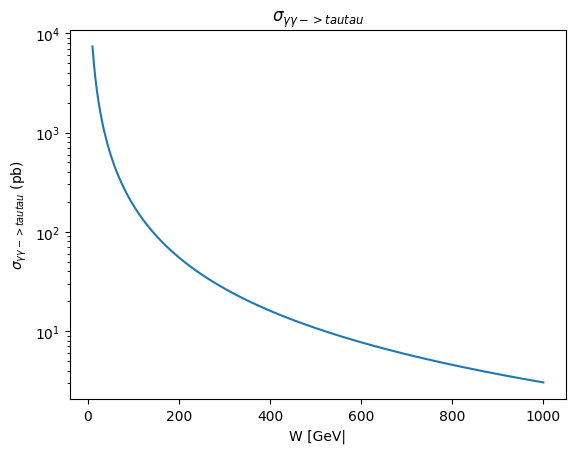

In [14]:
import numpy as np

import matplotlib.pyplot as plt

# Generate x values from 0 to 2*pi
wvalue = np.linspace(10, 1000, 300)


####################################################################

def cs_tautau_w(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mtau = 1.77686
    G = 4.2e-3
    Gyy = (2.27e-3)*(4.2e-3)
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    cs = 4.0 * np.pi * hbarc2 * alpha2 / wvalue / wvalue \
         * ((1.0+4.0*mtau*mtau/wvalue/wvalue)*np.log(wvalue * wvalue / mtau / mtau) - 1.0 - 2.0*mtau*mtau/wvalue/wvalue) * 1e9

    return cs
    

####################################################################


# Calculate y values using sin function
y = cs_tautau_w(wvalue)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(wvalue, y)

ax.set_yscale("log")

# Customize the plot
ax.set_xlabel('W [GeV|')
ax.set_ylabel('$\sigma_{\gamma \gamma -> tau tau}$ (pb)')
ax.set_title('$\sigma_{\gamma \gamma -> tau tau}$')

# Save the plot as a PDF file
plt.savefig('cs_tautau_w_plot.pdf')
plt.savefig('cs_tautau_w_plot.jpg')

# Show the plot
plt.show()


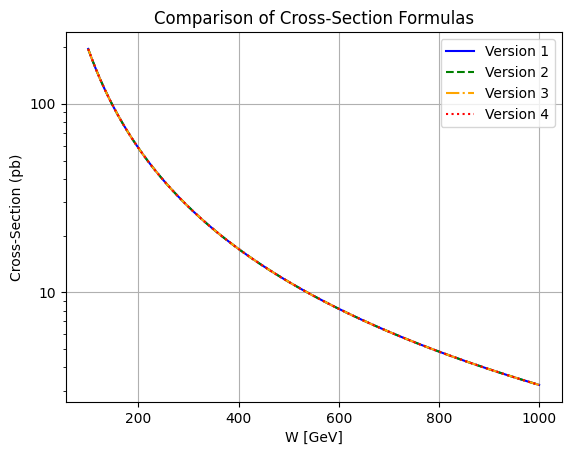

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Generate x values from 100 to 1000
wvalue = np.linspace(100, 1000, 300)

def cs_version_1(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mtau = 1.77686
    hbarc2 = 0.389
    alpha2 = (1.0/133.0)*(1.0/133.0)
    
    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))
    
    cs = 4.0 * np.pi * hbarc2 * alpha2 / wvalue / wvalue \
         * ( (1.0 + 4.0*mtau*mtau/wvalue/wvalue)*np.log(wvalue * wvalue / mtau / mtau) - beta* (1.0 + 4.0 * mtau * mtau / wvalue**2.0) )  * 1e9

    return cs



def cs_version_2(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mtau = 1.77686
    hbarc2 = 0.389
    alpha2 = (1.0/133.0)*(1.0/133.0)
    
    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))
    
    cs = 4.0 * np.pi * hbarc2 * alpha2 / wvalue / wvalue \
         * ( (1.0 + 4.0*mtau*mtau/wvalue/wvalue)*np.log(wvalue * wvalue / mtau / mtau) - 1.0 - 2.0*mtau*mtau/wvalue/wvalue)  * 1e9

    return cs



def cs_version_3(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mtau = 1.77686
    hbarc2 =  0.389
    alpha2 = (1.0/133.0)*(1.0/133.0)

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = np.where(wvalue > mtau, (4.0 * np.pi * alpha2 * hbarc2 ) / wvalue**2.0 * (beta) * \
             ( (3.0 - (beta**4.0))/(2.0 * beta) * np.log((1.0+beta)/(1.0-beta)) - 2.0 + beta**2.0), 0.) * 1e9

    return cs




def cs_version_4(wvalue):
    mtau = 1.77686
    hbarc2 = 0.389
    alpha2 = (1.0/133.0)*(1.0/133.0)
    
    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = 4.0 * np.pi * hbarc2 * alpha2 / wvalue**2.0 * \
         (2.0 * (1.0 + 4.0 * mtau**2 / wvalue**2.0 - 8.0 * mtau**4 / wvalue**4) * np.log(2.0 * wvalue / (mtau * (1.0 + beta))) - 
          beta * (1.0 + 4.0 * mtau**2 / wvalue**2.0)) * 1e9

    return cs





# Calculate y values using all three functions
y_version_1 = cs_version_1(wvalue)
y_version_2 = cs_version_2(wvalue)
y_version_3 = cs_version_3(wvalue)
y_version_4 = cs_version_4(wvalue)



# Create a figure and axes
fig, ax = plt.subplots()



# Plot the data with different colors
ax.plot(wvalue, y_version_1, label='Version 1', linestyle='solid', color='blue')
ax.plot(wvalue, y_version_2, label='Version 2', linestyle='dashed', color='green')
ax.plot(wvalue, y_version_3, label='Version 3', linestyle='dashdot', color='orange')
ax.plot(wvalue, y_version_4, label='Version 4', linestyle='dotted', color='red')



# Set y-axis scale to logarithmic
ax.set_yscale("log")

# Customize the plot
ax.set_xlabel('W [GeV]')
ax.set_ylabel('Cross-Section (pb)')
ax.set_title('Comparison of Cross-Section Formulas')
ax.legend()

# Set y-axis ticks in the form of 0.1, 0.2, etc.
ax.yaxis.set_major_formatter(ScalarFormatter())


plt.grid(True)


# Save the plot as a PDF file
plt.savefig('cross_section_comparison_plot.pdf')
plt.savefig('cross_section_comparison_plot.jpg')

# Show the plot
plt.show()



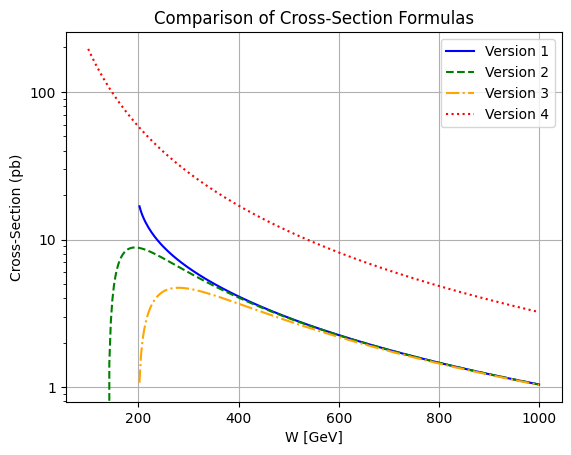

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Generate x values from 100 to 1000
wvalue = np.linspace(100, 1000, 300)

def cs_version_1(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mtau = 100
    hbarc2 = 0.389
    alpha2 = (1.0/133.0)*(1.0/133.0)
    
    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))
    
    cs = 4.0 * np.pi * hbarc2 * alpha2 / wvalue / wvalue \
         * ( (1.0 + 4.0*mtau*mtau/wvalue/wvalue)*np.log(wvalue * wvalue / mtau / mtau) - beta* (1.0 + 4.0 * mtau * mtau / wvalue**2.0) )  * 1e9

    return cs



def cs_version_2(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mtau = 100
    hbarc2 = 0.389
    alpha2 = (1.0/133.0)*(1.0/133.0)
    
    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))
    
    cs = 4.0 * np.pi * hbarc2 * alpha2 / wvalue / wvalue \
         * ( (1.0 + 4.0*mtau*mtau/wvalue/wvalue)*np.log(wvalue * wvalue / mtau / mtau) - 1.0 - 2.0*mtau*mtau/wvalue/wvalue)  * 1e9

    return cs



def cs_version_3(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mtau = 100
    hbarc2 =  0.389
    alpha2 = (1.0/133.0)*(1.0/133.0)

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = np.where(wvalue > mtau, (4.0 * np.pi * alpha2 * hbarc2 ) / wvalue**2.0 * (beta) * \
             ( (3.0 - (beta**4.0))/(2.0 * beta) * np.log((1.0+beta)/(1.0-beta)) - 2.0 + beta**2.0), 0.) * 1e9

    return cs





def cs_version_4(wvalue):
    mtau = 1.77686
    hbarc2 = 0.389
    alpha2 = (1.0/133.0)*(1.0/133.0)
    
    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = 4.0 * np.pi * hbarc2 * alpha2 / wvalue**2.0 * \
         (2.0 * (1.0 + 4.0 * mtau**2.0 / wvalue**2.0 - 8.0 * mtau**4.0 / wvalue**4.0) * np.log(2.0 * wvalue / (mtau * (1.0 + beta))) - 
          beta * (1.0 + 4.0 * mtau**2.0 / wvalue**2.0)) * 1e9

    return cs



# Calculate y values using all three functions
y_version_1 = cs_version_1(wvalue)
y_version_2 = cs_version_2(wvalue)
y_version_3 = cs_version_3(wvalue)
y_version_4 = cs_version_4(wvalue)



# Create a figure and axes
fig, ax = plt.subplots()



# Plot the data with different colors
ax.plot(wvalue, y_version_1, label='Version 1', linestyle='solid', color='blue')
ax.plot(wvalue, y_version_2, label='Version 2', linestyle='dashed', color='green')
ax.plot(wvalue, y_version_3, label='Version 3', linestyle='dashdot', color='orange')
ax.plot(wvalue, y_version_4, label='Version 4', linestyle='dotted', color='red')



# Set y-axis scale to logarithmic
ax.set_yscale("log")

# Customize the plot
ax.set_xlabel('W [GeV]')
ax.set_ylabel('Cross-Section (pb)')
ax.set_title('Comparison of Cross-Section Formulas')
ax.legend()

# Set y-axis ticks in the form of 0.1, 0.2, etc.
ax.yaxis.set_major_formatter(ScalarFormatter())


plt.grid(True)


# Save the plot as a PDF file
plt.savefig('cross_section_comparison_plot_100.pdf')   
plt.savefig('cross_section_comparison_plot_100.jpg') 

# Show the plot
plt.show()

